TypeError: Filter_by_condition() got an unexpected keyword argument 'Condition'

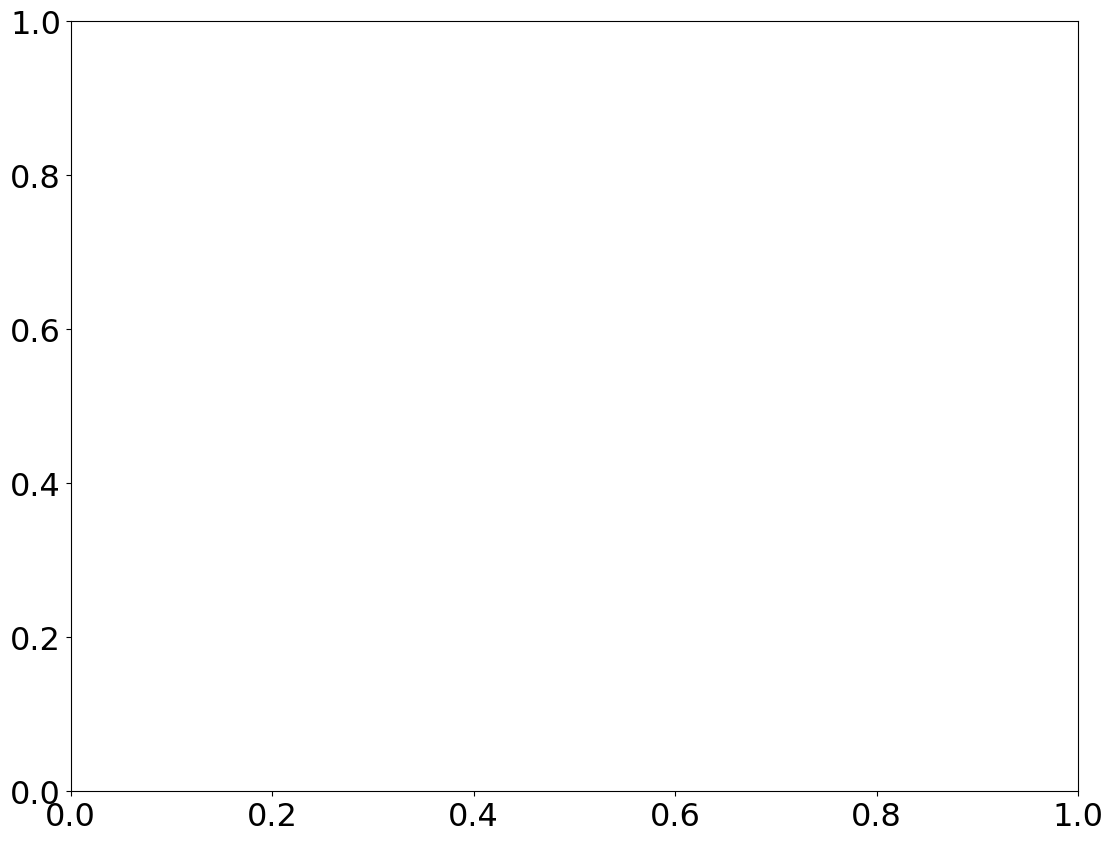

In [14]:
# -*- coding: utf-8 -*-

"""
@author: Nicolás Nieto - nnieto@sinc.unl.edu.ar

PSD - Plotting
"""

# In[] Imports modules
import mne

import numpy as np
import matplotlib.pyplot as plt

from data_extraction import Extract_block_data_from_subject, Extract_data_from_subject
from Data_processing import Filter_by_condition, Filter_by_class
from utilities import Ensure_dir, picks_from_channels

# In[] Imports modules

# Root where the data are stored
root_dir = "../Data/"
save_dir = "./Plots/"

# Subjets
N_S_list = [1,2,3,4,5,6,7,8,9,10]

# Data Parameters
datatype = "eeg"
Condition_list = ["Inner","Vis"]
Classes_list = ["All"]
channel = "A26"
# Get picks for the selected channels
picks = picks_from_channels(channel)
picks = ["A26"]


save_bool = True
prefix = "Power_Spectral_density_inner_vs_vis_beta"

#Fix all random states
random_state = 23
np.random.seed(random_state)

#Plotting
# Time Windows
tmin = 1
tmax = 3

fmin = 11
fmax = 32

y_min = 19
y_max = 31
bandwidth = 1
fontsize = 23


plt.rcParams.update({'font.size': fontsize})
plt.rcParams.update({'legend.framealpha':0})
colors = ["darkred","midnightblue"]    # "midnightblue" - "darkred" - "darkcyan" - "darkgreen"

# In[]: Fix Parameters

N_B = 1
N_S = 1
# Load a single subject to use the Epoched Object structure
X_S, Y = Extract_block_data_from_subject(root_dir,N_S,datatype,N_B=N_B)

Adquisition_eq = "biosemi128"
montage = mne.channels.make_standard_montage(Adquisition_eq)
X_S.set_montage(montage)



# In[]: Load Data
fig = plt.figure(figsize = [13, 10])
axs = plt.axes()
n_plot = 0
for Classes in Classes_list: 
    for Cond in Condition_list:
        count = 1
        for N_S in N_S_list:

            # Load full subject's data
            X , Y = Extract_data_from_subject(root_dir, N_S, datatype)
        
            # Filter by condition
            X_cond , Y_cond = Filter_by_condition(X, Y, Cond)
        
            # Filter by class
            X_class , Y_class =  Filter_by_class(X_cond,Y_cond,Classes)
            
            if count == 1:  
                X_data = X_class
                Y_data = Y_class
                count  = 2
            else:
                X_data = np.vstack((X_data,X_class))
                Y_data = np.vstack((Y_data,Y_class))

        # In[]: Plotting            
        # Put all data
        X_S._data = X_data
        X_S.events = Y_data

        color = colors[n_plot]
        # for next color
        n_plot = n_plot + 1
        
        fig = X_S.plot_psd(average = True , dB = True, estimate = "power", bandwidth = bandwidth,
                           color = color , picks = picks, fmin = fmin, 
                           fmax = fmax, tmin = tmin , tmax = tmax, ax = axs , )


# In[]: Saving



axs.legend(["Inner Speech", "Visualized"],loc='upper right', borderaxespad=0.9,fontsize=fontsize,shadow=False) 
axs.set_title(" ",fontsize=fontsize)
axs.set_ylim(bottom= y_min, top=y_max)

title = "Power Spectral Density"
fig.suptitle(title)   

# Save Figure
if save_bool:
    Ensure_dir(save_dir)
    fig.savefig(save_dir + prefix + '_' + channel + '_.png', transparent = True)   
    
